In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [190]:
# Carregar dataframe
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


In [191]:
#Pre-modelagem-e-Processamento-dos-Dados

#Checagem de tipos.
print(df.dtypes, '\n')

#Checagem de valores nulos.
valores_nulos = df.isnull().sum()
print(valores_nulos, '\n')

#Checagem de valores digitados errados.
#print('Valor_Aluguel', df['Valor_Aluguel'].unique())
#print('Valor_Condominio', df['Valor_Condominio'].unique())
#print('Metragem', df['Metragem'].unique())
#print('N_Quartos', df['N_Quartos'].unique())
#print('N_banheiros', df['N_banheiros'].unique())
#print('N_Suites', df['N_Suites'].unique())
#print('N_Vagas', df['N_Vagas'].unique())

# Corrigindo dtypes
df['Valor_Aluguel'] = df['Valor_Aluguel'].astype(float)
df['Valor_Condominio'] = df['Valor_Condominio'].astype(float)
df['Metragem'] = df['Metragem'].astype(float)

df.duplicated().sum()


Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object 

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64 



np.int64(598)

Como não tenho posse do endereço dessas casas de alugueis eu opto por não deletar pois duas pessoas podem morar em um único condomínio pagar o mesmo valor e alugar pelo mesmo valor.

In [192]:
#checagem de outilier
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


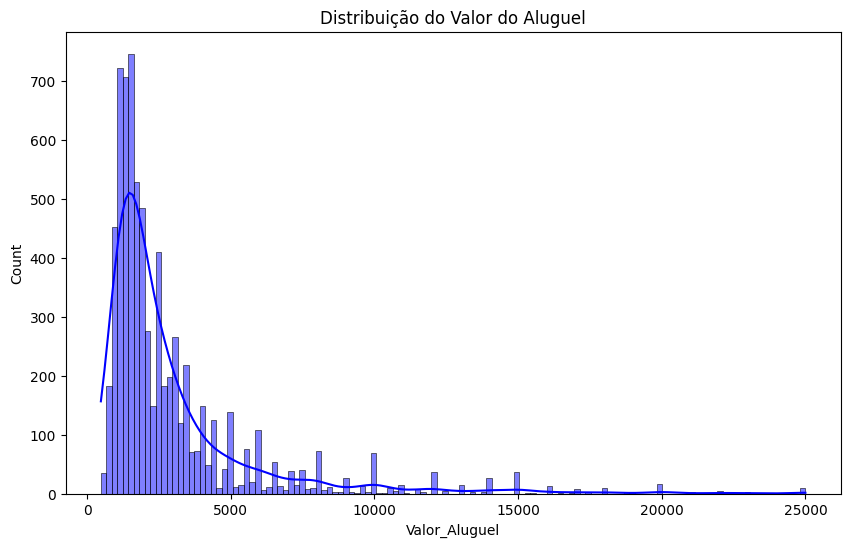

In [193]:
# Analisando a distribuição de Valor Aluguel
plt.figure(figsize=(10, 6))
sns.histplot(df['Valor_Aluguel'] , kde=True, label='Original', color='Blue')
plt.title('Distribuição do Valor do Aluguel')
plt.show()

#Avaliar como os valores de aluguel estão distribuídos e verificar se seguem uma tendência normal ou apresentam caudas longas (outliers).

* O histograma mostra concentração maior de valores em uma faixa mais baixa, com longa cauda à direita.

Isso indica que a maioria dos imóveis tem aluguel acessível, mas existem alguns de valor muito elevado.

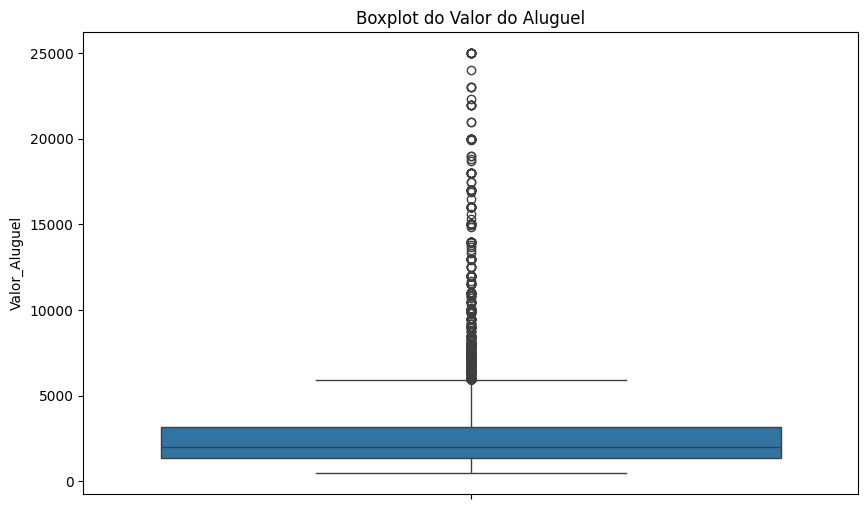

In [194]:
#Tratamento de outliers

# Anteriormente eu havia pensado em limitar a faixa de preço como se fosse a analise para a procura de um imovel (Visão do cliente)
# Mas o ideal é levar esses dados como se fosse dados de clientes, esses são os imóveis que possuo para alugar (Visão da imobiliária)
# O que se resume a não deletar os outliers e sim levá-los em consideração para alugar a novos clientes.
# outliers são clientes de alto valor e difícil ocupação

# Identificando outliers com boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Valor_Aluguel'])
plt.title('Boxplot do Valor do Aluguel')
plt.show()

# Método de tratamento: Limitação por faixa de preço.
#print('Linhas executadas:', len(df))

# Definindo os valores mínimo e máximo fixos
#valor_min = 700
#valor_max = 5000

# Filtrando o DataFrame para manter apenas os valores dentro desse intervalo
#df_tratado2 = df[(df['Valor_Aluguel'] >= valor_min) & (df['Valor_Aluguel'] <= valor_max)].copy()
#df = df_tratado2

#print('Linhas restantes:', len(df))


# Identificar outliers no valor do aluguel.

* O boxplot confirma a presença de diversos pontos acima do limite superior, reforçando a existência de imóveis com aluguel bem acima da mediana.

* Esses imóveis representam clientes potenciais de nicho (alto padrão).

Em vez de remover os outliers, é recomendável mantê-los, pois são oportunidades de mercado (imóveis premium).

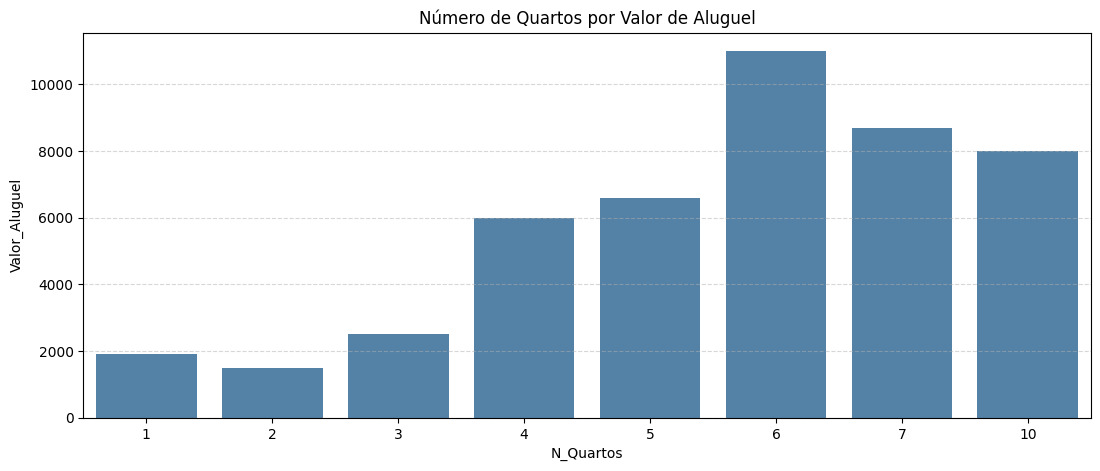

In [195]:
# 1 Agrupando N_Quartos e exibindo a mediana de Valor_Aluguel
df_n_quartos = df.groupby('N_Quartos')['Valor_Aluguel'].median().reset_index()

# Plota 2 gráficos
fig, axes = plt.subplots(1, figsize=(13, 5))

# Barplot de N_Quartos por Valor_Aluguel (cor padrão única)
sns.barplot(
    data=df_n_quartos,
    x='N_Quartos',
    y='Valor_Aluguel',
    color="steelblue",   # cor única padrão
    ax=axes
)
axes.grid(True, linestyle='--', axis='y', alpha=0.5)
axes.set_title('Número de Quartos por Valor de Aluguel')


plt.show()

#Avaliar a relação entre número de quartos e o valor mediano do aluguel.

* Existe tendência de crescimento no valor do aluguel conforme o número de quartos aumenta.

* Entretanto, após certo ponto (muitos quartos), o ganho em aluguel tende a se estabilizar.

O número de quartos influencia fortemente o preço, mas não de forma ilimitada.

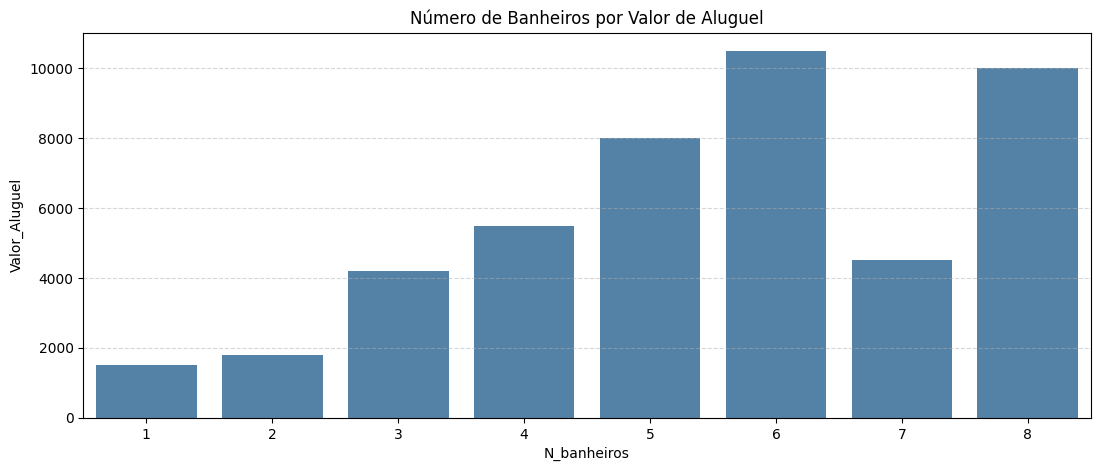

In [196]:
# 2 Agrupa N_banheiros e exibe a mediana de Valor_Aluguel
df_n_banheiros = df.groupby('N_banheiros')['Valor_Aluguel'].median().reset_index()

# Plota 2 gráficos
fig, axes = plt.subplots(1, figsize=(13, 5))

# Barplot de N_banheiros por Valor_Aluguel (cor padrão única)
sns.barplot(
    data=df_n_banheiros,
    x='N_banheiros',
    y='Valor_Aluguel',
    color="steelblue",   # cor única padrão
    ax=axes
)
axes.grid(True, linestyle='--', axis='y', alpha=0.5)
axes.set_title('Número de Banheiros por Valor de Aluguel')

plt.show()

# Verificar impacto do número de banheiros no valor do aluguel.

* A mediana de aluguel cresce de forma mais acentuada com o aumento dos banheiros em comparação aos quartos.

* Imóveis com mais banheiros são mais valorizados.

Banheiros têm forte peso na precificação, possivelmente maior que o número de quartos.

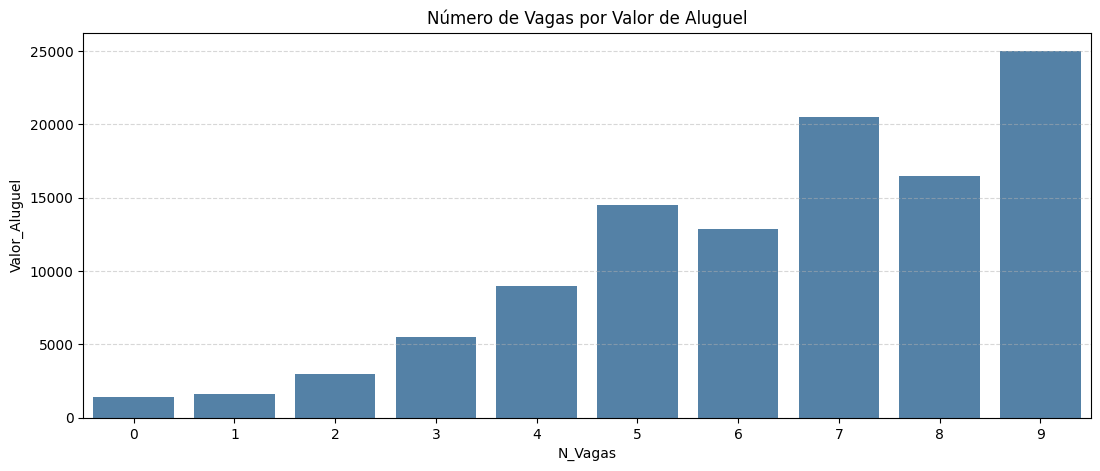

In [197]:
# Agrupa N_Vagas e exibe a mediana de Valor_Aluguel
df_n_vagas = df.groupby('N_Vagas')['Valor_Aluguel'].median().reset_index()

# Configura 2 gráficos
fig, axes = plt.subplots(1, figsize=(13, 5))

# Gráfico de N_Vagas por Valor_Aluguel (cor única padrão)
sns.barplot(
    data=df_n_vagas,
    x='N_Vagas',
    y='Valor_Aluguel',
    color="steelblue",   # cor padrão única
    ax=axes
)
axes.grid(True, linestyle='--', axis='y', alpha=0.5)
axes.set_title('Número de Vagas por Valor de Aluguel')

plt.show()


# Entender o impacto de vagas de garagem sobre o valor do aluguel.

* O aluguel cresce junto ao aumento das vagas, mas de forma menos intensa que banheiros e quartos.

* Pode haver um limite, já que a partir de muitas vagas, a valorização tende a ser pequena.

Vagas são valorizadas, mas não são o principal fator de precificação.

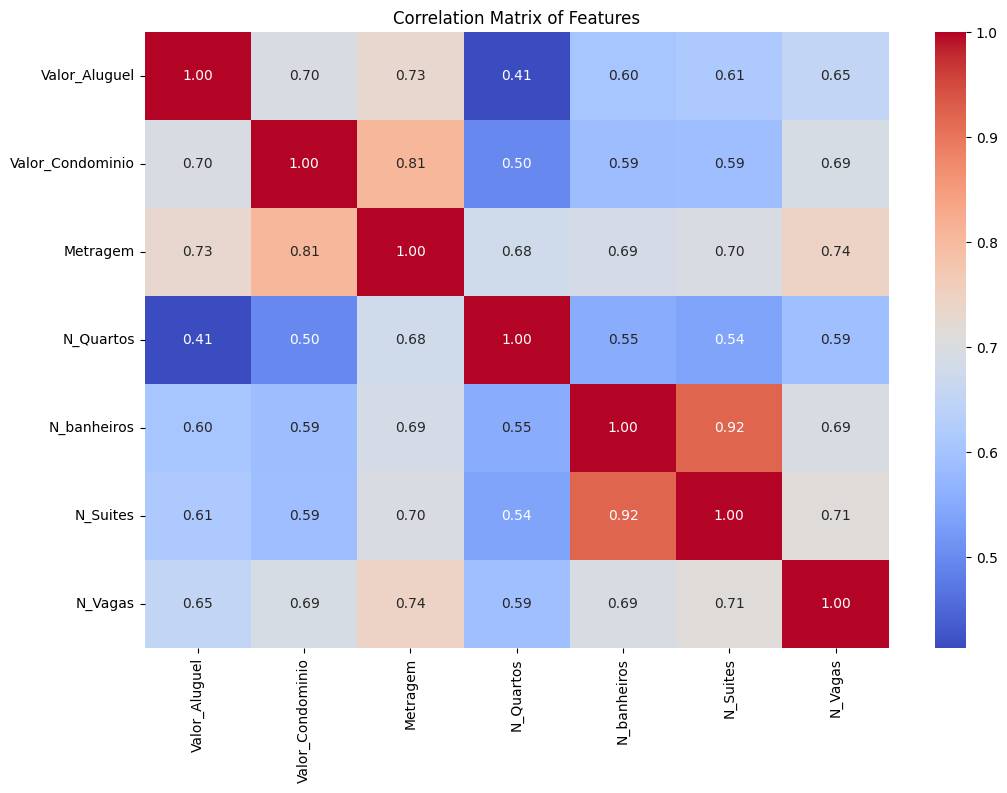

Valor_Aluguel       1.000000
Metragem            0.730591
Valor_Condominio    0.695302
N_Vagas             0.652858
N_Suites            0.614397
N_banheiros         0.603715
N_Quartos           0.413139
Name: Valor_Aluguel, dtype: float64


In [198]:
# matriz de correlação
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

print(correlation_matrix['Valor_Aluguel'].sort_values(ascending=False))

In [199]:
# Separação das variáveis independentes (X) e dependente (y)
X = df.drop(columns='Valor_Aluguel')
y = df['Valor_Aluguel']

In [200]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Shapes após divisão:")
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")

Shapes após divisão:
X_train: (5402, 6)
X_test : (1801, 6)
y_train: (5402,)
y_test : (1801,)


In [201]:
# 2. Treinamento do modelo
modelo = LinearRegression()
modelo.fit(X_train[['Metragem']], y_train)

# Resultados
intercepto = modelo.intercept_
coef = modelo.coef_[0]

print("\nParâmetros do modelo:")
print(f"Intercepto: {intercepto:.2f}")
print(f"Coeficiente (Metragem): {coef:.2f}")

# Equação da reta
equacao = f"Valor do Aluguel = {intercepto:.2f} + {coef:.2f} * Metragem"
print(f"\nEquação da reta:\n{equacao}")



Parâmetros do modelo:
Intercepto: -103.18
Coeficiente (Metragem): 34.71

Equação da reta:
Valor do Aluguel = -103.18 + 34.71 * Metragem


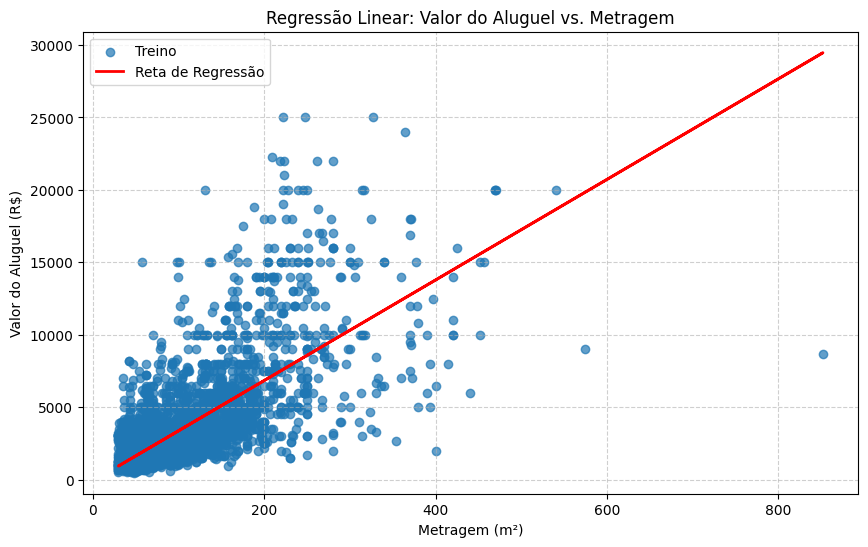

In [202]:
# 3. Visualização
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Metragem'], y_train, alpha=0.7, label='Treino')
plt.plot(
    X_train['Metragem'],
    modelo.predict(X_train[['Metragem']]),
    color='red',
    linewidth=2,
    label='Reta de Regressão'
)
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel (R$)')
plt.title('Regressão Linear: Valor do Aluguel vs. Metragem')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Visualizar o ajuste da regressão linear simples usando apenas a metragem.


* Existe uma relação clara de crescimento: imóveis maiores custam mais.

* Porém, há dispersão de pontos, indicando que apenas metragem não explica totalmente o valor.


A metragem é determinante, mas o modelo melhora se incluir outras variáveis como banheiros e suítes.

In [203]:
# Selecionando as variáveis independentes
X = df[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]

# Separando a variável dependente e preditiva
y = df['Valor_Aluguel']

# Treinando o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [204]:
regressao_aluguel_multipla = LinearRegression()
regressao_aluguel_multipla.fit(X_train, y_train)

LinearRegression()

In [205]:
r2_train = regressao_aluguel_multipla.score(X_train, y_train)
print('O coeficiente angular é: ', regressao_aluguel_multipla.coef_)
print('O coeficiente linear é: ', regressao_aluguel_multipla.intercept_)
print('O R quadrado é: ', regressao_aluguel_multipla.score(X_train, y_train))

O coeficiente angular é:  [   0.77302112   20.72122898 -659.00604215  240.76046013  340.61447028
  522.98401929]
O coeficiente linear é:  411.92895077384765
O R quadrado é:  0.5971610197647366


In [206]:
r2_test = regressao_aluguel_multipla.score(X_test, y_test)
r2_test

0.6327633459161506

# Conclusão Geral

O valor do aluguel é mais influenciado por metragem, banheiros e quartos.

Vagas de garagem agregam valor, mas com menor impacto.

Há outliers relevantes, que não devem ser descartados, pois representam imóveis de luxo.

A regressão linear simples com metragem explica parte da variação, mas a combinação de variáveis gera um modelo mais robusto.